
Sita Dawanse


[Global Data on Sustainable Energy](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy)

 This dataset contains sustainable energy indicators and other useful factors across all countries from 2000 to 2020, including vital aspects like electricity access, renewable energy, carbon emissions, energy intensity, Financial flows, and economic growth. With the help of this data expect to gain profound insights into global energy consumption patterns over time.

 Other data set that will be useful to explore will be,

 [CO2 emission](https://www.kaggle.com/datasets/imtkaggleteam/co-and-greenhouse-gas-emissions)
 This dataset comprises records of CO2 and other greenhouse gas emissions over several years. It enables the identification of any potential patterns related to energy consumption.


Collaboration is not applicable to this project, as I'm working independently. However, I fully dedicated to handle the project efficiently, ensuring that I meet the stated timetable and objectives. I'll use resources like internet forums, documentation, and tutorials to get help or guidance if necessary.My major tools for data analysis and visualization will be programming language such as Python, as well as data manipulation and visualization packages like pandas and matplotlib/seaborn. In addition, I will use GitHub for version control and cooperation with my future self.
I will organize my work schedule to be closely aligned with the project's deadline and objectives.
I plan my work schedule according the project's deadline and objectives.This includes allocating  specific time slots for research, data analysis, model building, and documentation as needed.




In [1]:
# Import the important Libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Loading the dataset to Pandas DataFrame
Energy_df = pd.read_csv("/content/drive/MyDrive/Data_Science/project/Global/global-data-on-sustainable-energy.csv")
Energy_df.head()
Energy_df.tail()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,48.680350,3227.6802,10.00,11020.00046,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,58.503407,3068.0115,9.51,10340.00015,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,59.412407,3441.9858,9.83,12380.00011,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,55.582527,3003.6553,10.47,11760.00023,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857
3648,Zimbabwe,2020,52.747670,30.4,80.61,30000.0,81.90,3.40,0.0,4.19,55.204216,2680.1318,10.00,NaN,NaN,-6.248748,1214.509820,38,390757.0,-19.015438,29.154857


In [3]:
#Listing the North_American countries
north_america_countries = ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba', 'Dominica',
    'Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua',
    'Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago',
    'United States']

# Filtering the DataFrame to include only North_american countries
north_america_df = Energy_df.loc[Energy_df['Entity'].isin(north_america_countries)].copy()

# Save north_america_df to csv file
north_america_df.to_csv("north_america_data.csv", index = False)

North_america_df = pd.read_csv("/content/north_america_data.csv")
North_america_df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Antigua and Barbuda,2000,97.689260,100.0,0.0,NaN,0.0,0.14,0.0,0.0,0.0,28457.223,3.13,330.000000,NaN,6.203431,10872.29295,223,443.0,17.060816,-61.796428
1,Antigua and Barbuda,2001,97.785255,100.0,0.0,NaN,0.0,0.16,0.0,0.0,0.0,28025.290,3.31,350.000000,NaN,-4.548003,10367.31961,223,443.0,17.060816,-61.796428
2,Antigua and Barbuda,2002,100.000000,100.0,0.0,NaN,0.0,0.18,0.0,0.0,0.0,29660.344,3.59,389.999986,NaN,1.027442,10401.05088,223,443.0,17.060816,-61.796428
3,Antigua and Barbuda,2003,97.956825,100.0,0.0,NaN,0.0,0.20,0.0,0.0,0.0,30824.252,3.63,409.999996,NaN,6.076544,10797.95106,223,443.0,17.060816,-61.796428
4,Antigua and Barbuda,2004,98.037100,100.0,0.0,NaN,0.0,0.21,0.0,0.0,0.0,31622.059,3.57,400.000006,NaN,5.767029,11446.96914,223,443.0,17.060816,-61.796428


In [4]:
# Set 'Entity' and 'Year' columns as index
North_america_df.set_index(['Entity', 'Year'], inplace=True)
North_america_df.head()

Access to electricity (% of population)  \
Entity              Year                                            
Antigua and Barbuda 2000                                97.689260   
                    2001                                97.785255   
                    2002                               100.000000   
                    2003                                97.956825   
                    2004                                98.037100   

                          Access to clean fuels for cooking  \
Entity              Year                                      
Antigua and Barbuda 2000                              100.0   
                    2001                              100.0   
                    2002                              100.0   
                    2003                              100.0   
                    2004                              100.0   

                          Renewable-electricity-generating-capacity-per-capita  \
Entity              Year                                                         
Antigua and Barbuda 2000                                                0.0      
                    2001                                                0.0      
                    2002                                                0.0      
                    2003                                                0.0      
                    2004                                                0.0      

                          Financial flows to developing countries (US $)  \
Entity              Year                                                   
Antigua and Barbuda 2000                                             NaN   
                    2001                                             NaN   
                    2002                                             NaN   
                    2003                                             NaN   
                    2004                                             NaN   

                          Renewable energy share in the total final energy consumption (%)  \
Entity              Year                                                                     
Antigua and Barbuda 2000                                                0.0                  
                    2001                                                0.0                  
                    2002                                                0.0                  
                    2003                                                0.0                  
                    2004                                                0.0                  

                          Electricity from fossil fuels (TWh)  \
Entity              Year                                        
Antigua and Barbuda 2000                                 0.14   
                    2001                                 0.16   
                    2002                                 0.18   
                    2003                                 0.20   
                    2004                                 0.21   

                          Electricity from nuclear (TWh)  \
Entity              Year                                   
Antigua and Barbuda 2000                             0.0   
                    2001                             0.0   
                    2002                             0.0   
                    2003                             0.0   
                    2004                             0.0   

                          Electricity from renewables (TWh)  \
Entity              Year                                      
Antigua and Barbuda 2000                                0.0   
                    2001                                0.0   
                    2002                                0.0   
                    2003                                0.0   
                    2004                                0.0   

              

In [5]:
# Fill NaN in each column by 0
North_america_df.fillna(0);

In [6]:
# check missing values in columns
North_america_df.isnull().sum()

Access to electricity (% of population)                               0
Access to clean fuels for cooking                                     0
Renewable-electricity-generating-capacity-per-capita                 42
Financial flows to developing countries (US $)                      264
Renewable energy share in the total final energy consumption (%)     23
Electricity from fossil fuels (TWh)                                   0
Electricity from nuclear (TWh)                                        0
Electricity from renewables (TWh)                                     0
Low-carbon electricity (% electricity)                                0
Primary energy consumption per capita (kWh/person)                    0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          23
Value_co2_emissions_kt_by_country                                   103
Renewables (% equivalent primary energy)                            399
gdp_growth                                                      

In [7]:
# check the statistical information for the dataset
North_america_df.describe()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
count,483.000000,483.000000,441.000000,2.190000e+02,460.000000,483.000000,483.000000,483.000000,483.000000,483.000000,460.000000,3.800000e+02,84.000000,399.000000,399.000000,483.000000,4.830000e+02,483.000000,483.000000
mean,91.237958,81.656004,95.034558,4.197306e+07,22.651348,136.656812,38.618137,41.593934,29.428154,26587.691064,4.519978,3.395398e+05,10.246107,2.300527,10847.864398,188.913043,9.793458e+05,18.481245,-77.149814
std,13.664655,24.773086,123.950858,9.492361e+07,21.414476,559.528519,161.532173,128.185234,29.014980,35566.004222,3.695702,1.190077e+06,11.022240,4.375466,13202.015819,154.419152,2.786825e+06,9.975725,14.103692
min,31.542381,2.600000,0.000000,0.000000e+00,0.000000,0.030000,0.000000,0.000000,0.000000,836.080400,1.270000,1.200000e+02,0.004740,-20.192371,542.333596,4.000000,2.610000e+02,8.537981,-106.346771
25%,88.013810,82.450000,5.240000,2.550000e+05,6.737500,0.265000,0.000000,0.010000,0.490316,8666.838500,2.670000,1.477500e+03,2.584442,0.890848,3400.065715,58.000000,6.160000e+02,12.984305,-88.497650
50%,96.802520,89.600000,58.340000,2.450000e+06,15.780000,1.890000,0.000000,0.450000,20.952381,11274.687000,3.695000,7.525000e+03,5.969559,2.717368,6139.718783,167.000000,2.296600e+04,15.783471,-77.781167
75%,100.000000,100.000000,114.910000,3.150500e+07,33.412500,6.515000,0.000000,4.120000,52.462604,26481.503500,4.977500,2.088750e+04,14.606155,4.441327,12276.427600,284.000000,1.108600e+05,18.971187,-61.679000
max,100.000000,100.000000,622.840000,5.963700e+08,82.190000,2988.240000,809.410000,821.400000,99.121710,165831.280000,21.600000,5.775810e+06,30.542150,14.440990,65279.529030,668.000000,9.984670e+06,56.130366,-59.543198


<Axes: xlabel='Financial flows to developing countries (US $)', ylabel='Renewable-electricity-generating-capacity-per-capita'>

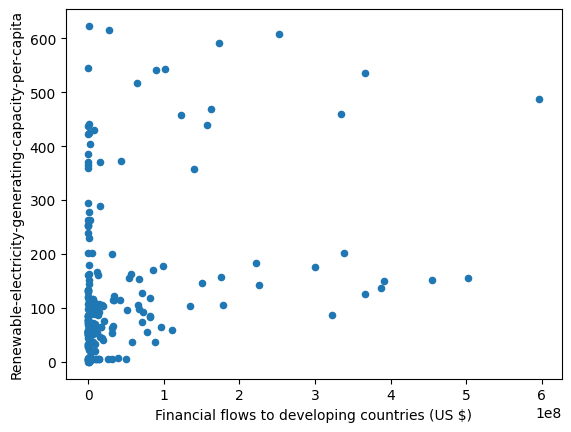

In [8]:
North_america_df.plot.scatter(x="Financial flows to developing countries (US $)",
                              y="Renewable-electricity-generating-capacity-per-capita")

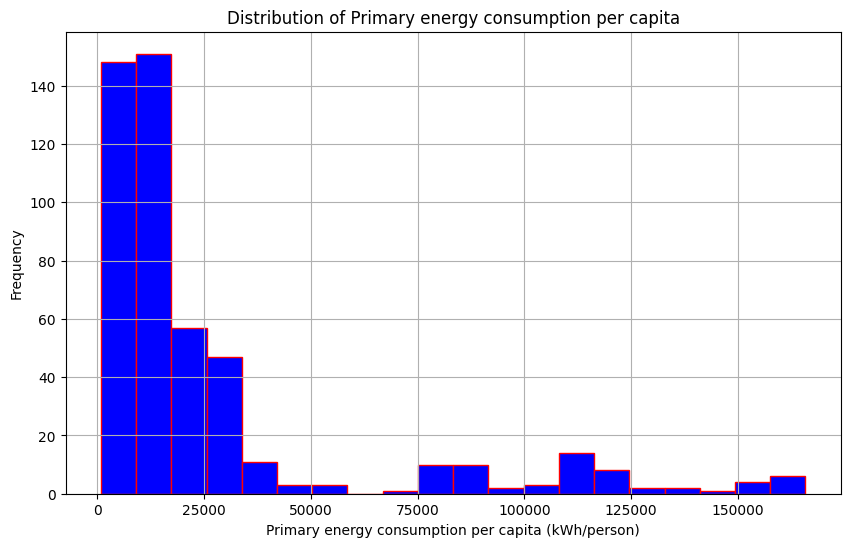

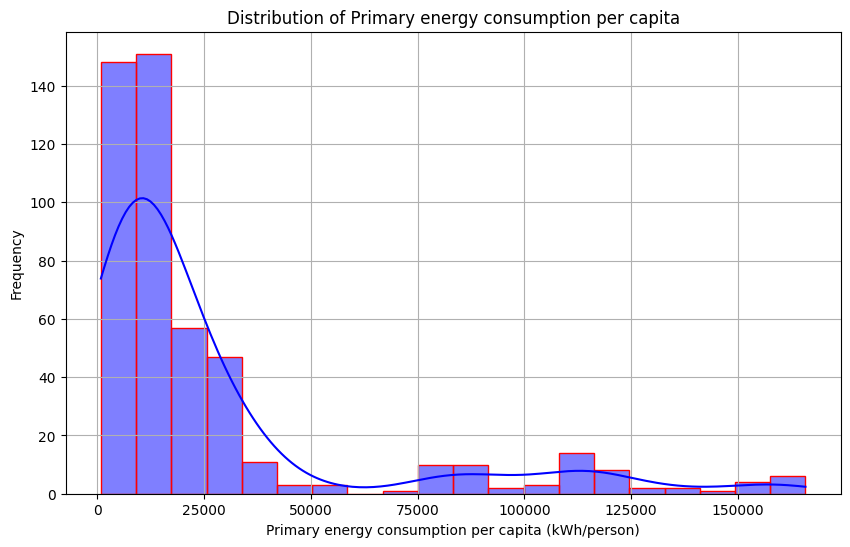

In [16]:
#Plot the histogram and distribution plot together
plt.figure(figsize=(10, 6))
sns.histplot(North_america_df['Primary energy consumption per capita (kWh/person)'],
             bins=20,  kde=True, color='blue', edgecolor='red')
plt.xlabel('Primary energy consumption per capita (kWh/person)')
plt.ylabel('Frequency')
plt.title('Distribution of Primary energy consumption per capita')
plt.grid(True)
plt.show()

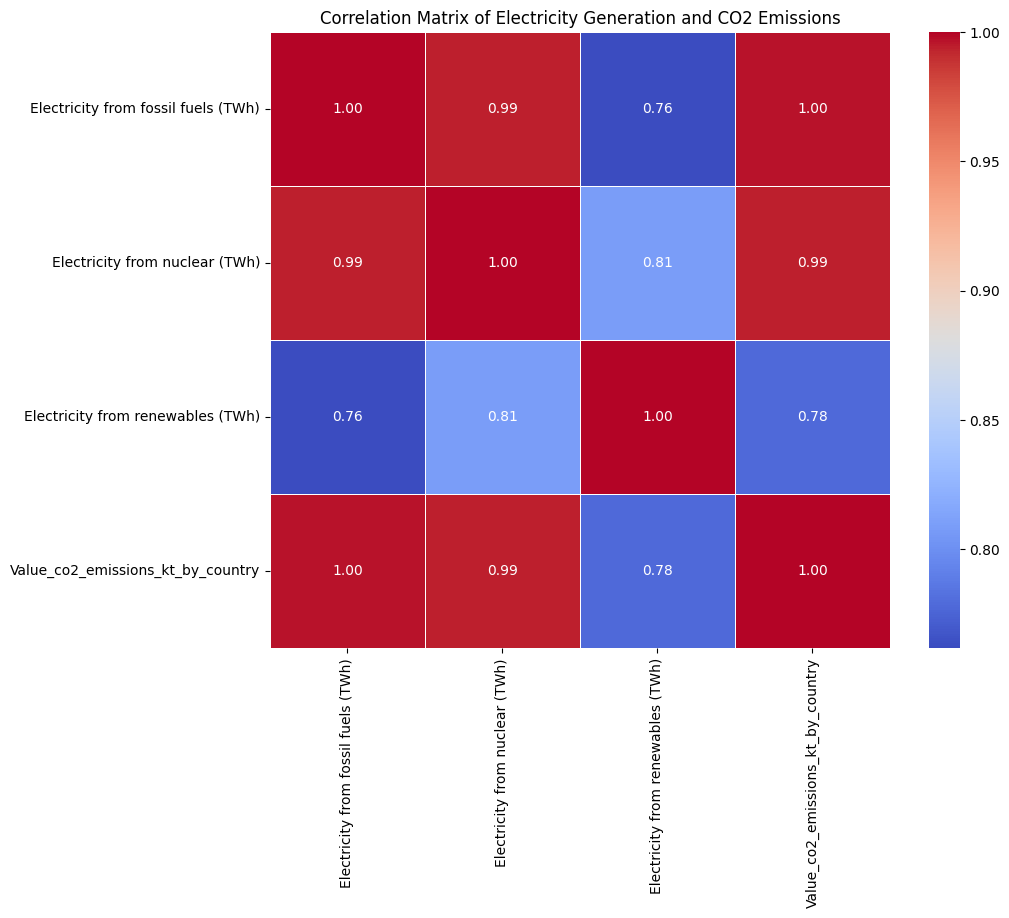

In [10]:
# Select relevant columns for analysis
relevant_data =North_america_df[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
                      'Electricity from renewables (TWh)', 'Value_co2_emissions_kt_by_country']]

# Drop rows with any missing values
relevant_data.dropna()

# Calculate the correlation matrix
correlation_matrix = relevant_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Electricity Generation and CO2 Emissions')
plt.show()